In [4]:
# importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
#reading the dataset
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
# Drop CustomerID (not useful for clustering)
df_clean = data.drop('CustomerID', axis=1)

# Convert Gender to numeric (0/1) - optional
df_clean['Gender'] = df_clean['Gender'].map({'Male':0, 'Female':1})

print("Updated columns:", df_clean.columns.tolist())
df_clean

Updated columns: ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


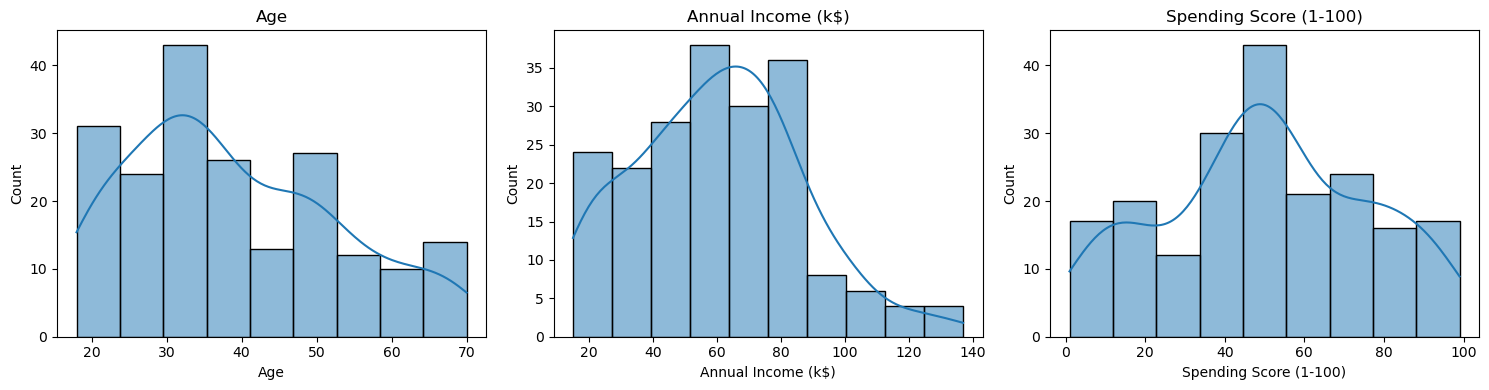

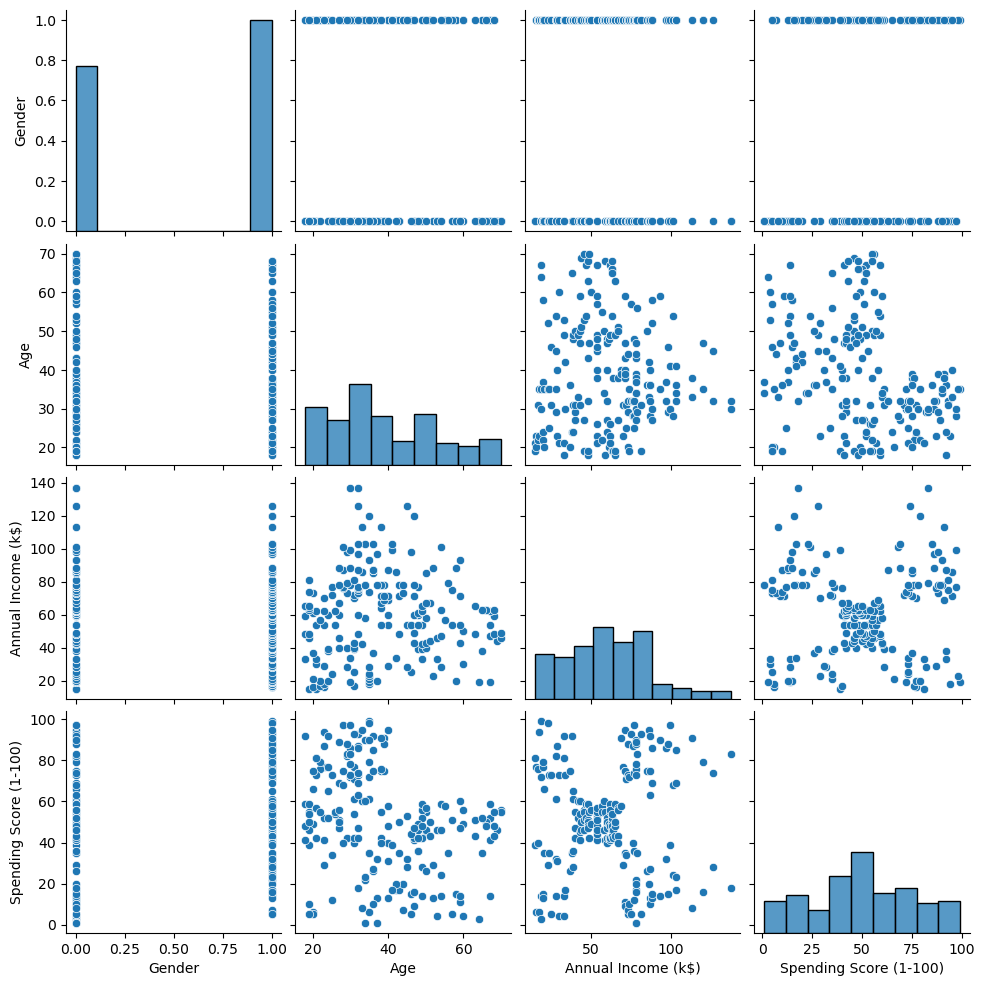

In [19]:
# Numerical features distribution
plt.figure(figsize=(15,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1,3,i+1)
    sn.histplot(df_clean[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Pairplot to see relationships
sn.pairplot(df_clean)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (we'll start with spending habits)
X = df_clean[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled successfully!")
print("Sample scaled data:\n", X_scaled[:3])

Data scaled successfully!
Sample scaled data:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]]


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

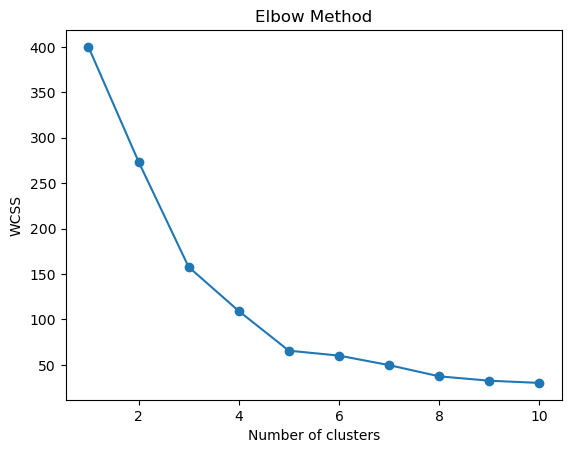

In [22]:
from sklearn.cluster import KMeans

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Perform final clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original data
df_clean['Cluster'] = clusters

# Cluster centers in original scale (not standardized)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(" Cluster Centers (Annual Income vs Spending Score):")
print(pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

 Cluster Centers (Annual Income vs Spending Score):
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


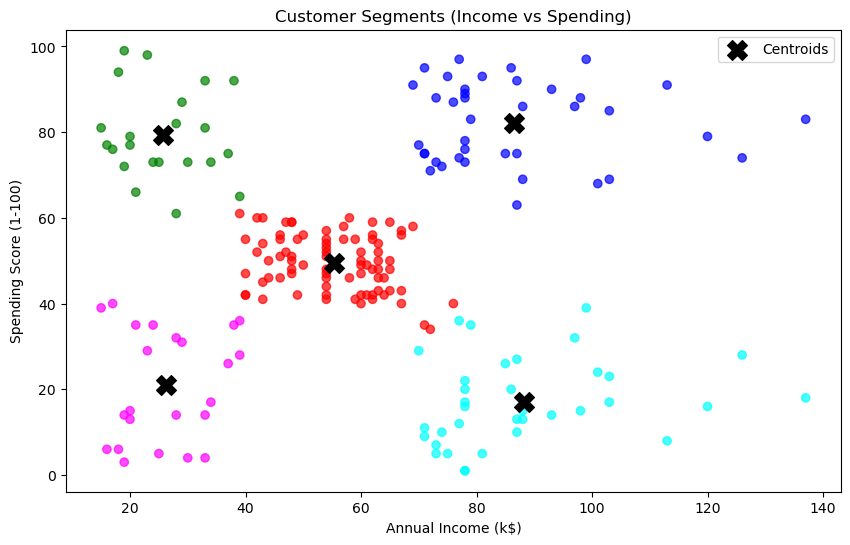

In [24]:
# Create color map for clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
df_clean['Color'] = df_clean['Cluster'].map(lambda x: colors[x])

# Plot the clusters
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Annual Income (k$)'], 
            df_clean['Spending Score (1-100)'], 
            c=df_clean['Color'], alpha=0.7)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
            marker='X', s=200, c='black', label='Centroids')
plt.title('Customer Segments (Income vs Spending)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [26]:
# First ensure proper data types
df_clean['Gender'] = df_clean['Gender'].astype('int64')  # Convert to numeric

# Now analyze clusters
cluster_profile = df_clean.groupby('Cluster').mean(numeric_only=True)

print("Cluster Profiles:")
print(cluster_profile[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Enhanced interpretation
interpretation = {
    0: {
        "Description": "High Income, Low Spending",
        "Characteristics": "Older customers who earn well but spend cautiously",
        "Marketing Strategy": "Luxury items with value messaging"
    },
    1: {
        "Description": "Moderate Income, Moderate Spending",
        "Characteristics": "Middle-aged balanced spenders",
        "Marketing Strategy": "Bundled offers and loyalty programs"
    },
    2: {
        "Description": "High Income, High Spending (Target)",
        "Characteristics": "Young affluent shoppers",
        "Marketing Strategy": "Premium products and VIP services"
    },
    3: {
        "Description": "Low Income, High Spending",
        "Characteristics": "Young spendthrifts",
        "Marketing Strategy": "Trendy items with payment plans"
    },
    4: {
        "Description": "Low Income, Low Spending",
        "Characteristics": "Budget-conscious all ages",
        "Marketing Strategy": "Discounts and value packs"
    }
}

for cluster, info in interpretation.items():
    print(f" Cluster {cluster}: {info['Description']}")
    print(f" Typical Customer: {info['Characteristics']}")
    print(f" Recommended Strategy: {info['Marketing Strategy']}")
    print(cluster_profile.loc[cluster])

Cluster Profiles:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.592593  42.716049           55.296296               49.518519
1        0.538462  32.692308           86.538462               82.128205
2        0.590909  25.272727           25.727273               79.363636
3        0.457143  41.114286           88.200000               17.114286
4        0.608696  45.217391           26.304348               20.913043
 Cluster 0: High Income, Low Spending
 Typical Customer: Older customers who earn well but spend cautiously
 Recommended Strategy: Luxury items with value messaging
Gender                     0.592593
Age                       42.716049
Annual Income (k$)        55.296296
Spending Score (1-100)    49.518519
Name: 0, dtype: float64
 Cluster 1: Moderate Income, Moderate Spending
 Typical Customer: Middle-aged balanced spenders
 Recommended Strategy: Bundled offers and 

In [27]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.3f} (Best=1, Worst=-1)")
print("0.5+ suggests good separation")
print("0.2-0.5: Some structure exists")
print("<0.2: Weak clustering")

Silhouette Score: 0.555 (Best=1, Worst=-1)
0.5+ suggests good separation
0.2-0.5: Some structure exists
<0.2: Weak clustering


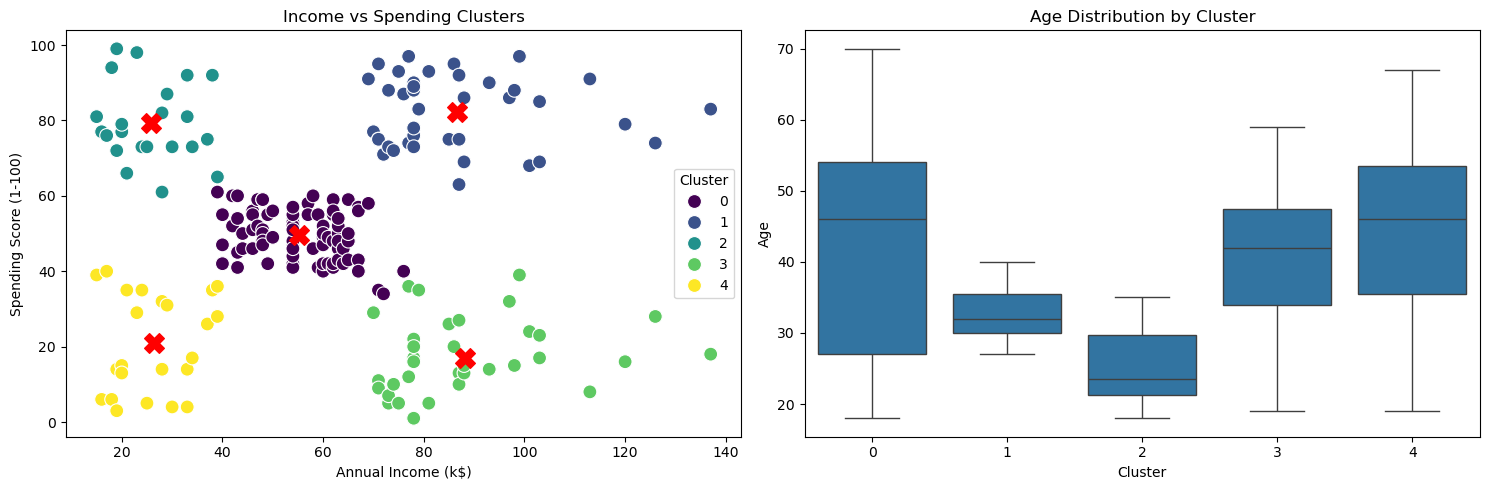

In [29]:
# Enhanced cluster visualization
plt.figure(figsize=(15,5))

# Plot 1: Income vs Spending
plt.subplot(1,2,1)
sn.scatterplot(data=df_clean, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.title('Income vs Spending Clusters')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='X', s=200, c='red')

# Plot 2: Age Distribution by Cluster
plt.subplot(1,2,2)
sn.boxplot(data=df_clean, x='Cluster', y='Age')
plt.title('Age Distribution by Cluster')
plt.tight_layout()
plt.show()

In [30]:
# Generate business insights
print(" ACTIONABLE RECOMMENDATIONS:\n")

for cluster in sorted(df_clean['Cluster'].unique()):
    cluster_data = df_clean[df_clean['Cluster'] == cluster]
    
    print(f" CLUSTER {cluster} - {interpretation[cluster]['Description']}:")
    print(f"• Target with: {interpretation[cluster]['Marketing Strategy']}")
    print(f"• Average Age: {cluster_profile.loc[cluster,'Age']:.1f} years")
    print(f"• Female Ratio: {cluster_profile.loc[cluster,'Gender']*100:.1f}%")
    print(f"• Key Characteristics: {interpretation[cluster]['Characteristics']}\n")

 ACTIONABLE RECOMMENDATIONS:

 CLUSTER 0 - High Income, Low Spending:
• Target with: Luxury items with value messaging
• Average Age: 42.7 years
• Female Ratio: 59.3%
• Key Characteristics: Older customers who earn well but spend cautiously

 CLUSTER 1 - Moderate Income, Moderate Spending:
• Target with: Bundled offers and loyalty programs
• Average Age: 32.7 years
• Female Ratio: 53.8%
• Key Characteristics: Middle-aged balanced spenders

 CLUSTER 2 - High Income, High Spending (Target):
• Target with: Premium products and VIP services
• Average Age: 25.3 years
• Female Ratio: 59.1%
• Key Characteristics: Young affluent shoppers

 CLUSTER 3 - Low Income, High Spending:
• Target with: Trendy items with payment plans
• Average Age: 41.1 years
• Female Ratio: 45.7%
• Key Characteristics: Young spendthrifts

 CLUSTER 4 - Low Income, Low Spending:
• Target with: Discounts and value packs
• Average Age: 45.2 years
• Female Ratio: 60.9%
• Key Characteristics: Budget-conscious all ages

